# Coil Correction

In [1]:
import matplotlib.pyplot as plt
import nibabel
import os
import numpy as np

from ia_mri_tools.features import input_normalization

plt.ion()
plt.style.use('seaborn-white')


def im_show(h, n, m, i, title=None, colorbar=True, pmin=2, pmax=98):
    plt.subplot(n, m, i)
    plt.imshow(h[:, ::-1].transpose(), cmap='gray', vmin=np.percentile(h, pmin), vmax=np.percentile(h, pmax))
    plt.axis('off')
    if title:
        plt.title(title)
    if colorbar:
        plt.colorbar()


def hist_show(d, n, m, i, title=None, min_val=None, max_val=None, bins=50):

    h = d.ravel()
    if min_val:
        h = h[h >= min_val]
    if max_val:
        h = h[h <= max_val]

    plt.subplot(n, m, i)
    plt.hist(h, bins=bins)
    if title:
        plt.title(title)


def load_data(dset, z=None, data_path='data/HCP/100307'):
    """

    :param dset: string 'T1', 'T2', 'T1r', 'T2r', or 'aparc+aseg'
    :param z: integer slice number
    :param data_path: path to the data
    :return: data as a numpy array
    """

    if dset == 'T1':
        dset_path = os.path.join(data_path, 'T1w_acpc_dc.nii.gz')
    elif dset == 'T2':
        dset_path = os.path.join(data_path, 'T2w_acpc_dc.nii.gz')
    elif dset == 'T1r':
        dset_path = os.path.join(data_path, 'T1w_acpc_dc_restore.nii.gz')
    elif dset == 'T2r':
        dset_path = os.path.join(data_path, 'T2w_acpc_dc_restore.nii.gz')
    elif dset == 'aparc+aseg':
        dset_path = os.path.join(data_path, 'aparc+aseg.nii.gz')
    else:
        raise NameError('Unknown data set name.')

    # read the volume
    data = nibabel.load(dset_path).get_data()
    # select a slice if needed
    if z:
        data = data[:, :, z]

    return data


In [2]:
# Load the data for a single slice
t1 = load_data('T1', z=120).astype('float32')
t2 = load_data('T2', z=120).astype('float32')
t1r = load_data('T1r', z=120).astype('float32')
t2r = load_data('T2r', z=120).astype('float32')

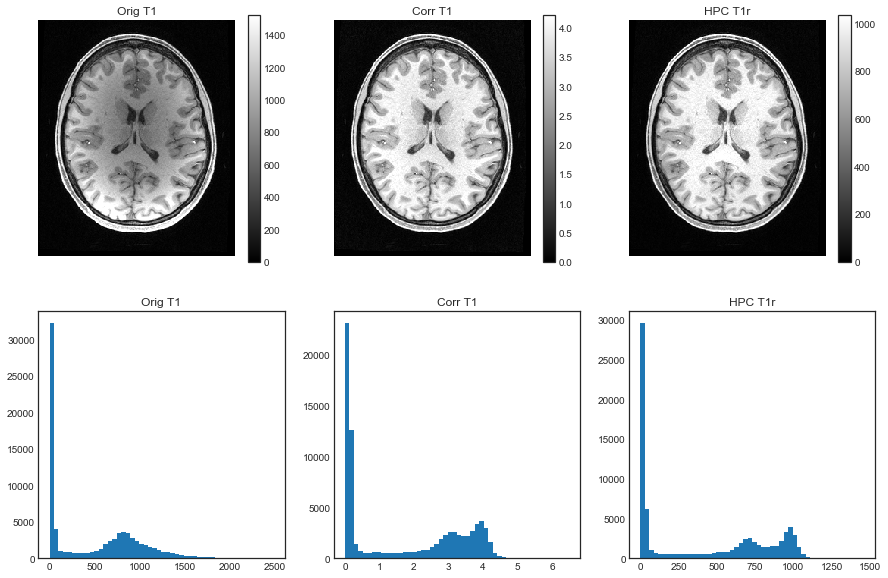

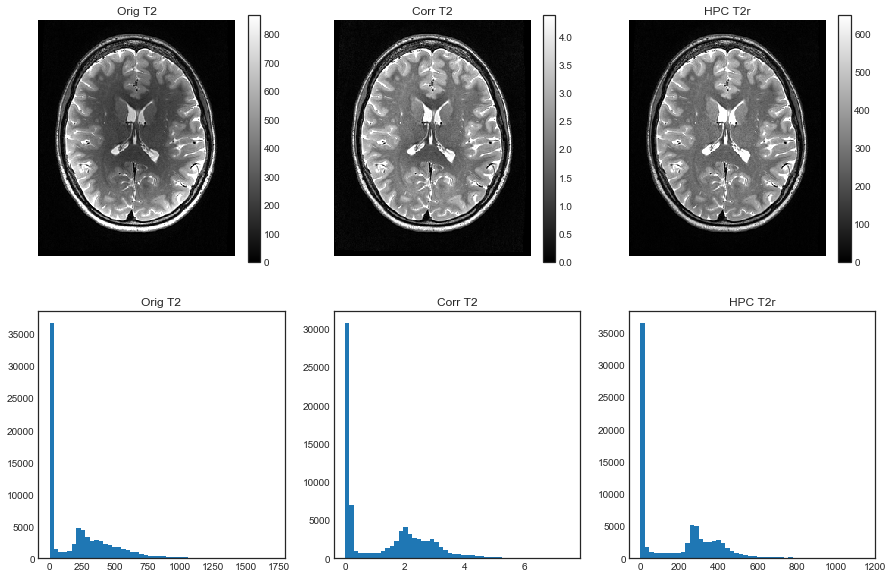

In [3]:
# Coil correction for both T1 and T2 images
# comparing to the HPC corrected data
ct1 = input_normalization(t1)
ct2 = input_normalization(t2)

plt.figure(figsize=[15,10])
im_show(t1,  2,3,1, 'Orig T1')
im_show(ct1, 2,3,2, 'Corr T1')
im_show(t1r, 2,3,3, 'HPC T1r')
hist_show(t1,  2,3,4, 'Orig T1')
hist_show(ct1, 2,3,5, 'Corr T1')
hist_show(t1r, 2,3,6, 'HPC T1r')

plt.figure(figsize=[15,10])
im_show(t2,  2,3,1, 'Orig T2')
im_show(ct2, 2,3,2, 'Corr T2')
im_show(t2r, 2,3,3, 'HPC T2r')
hist_show(t2,  2,3,4, 'Orig T2')
hist_show(ct2, 2,3,5, 'Corr T2')
hist_show(t2r, 2,3,6, 'HPC T2r')